In [56]:
from astropy.io import fits
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [57]:
filename = 'healpix_beam.fits'
beam_E = fits.getdata(filename, extname='BEAM_E')
nside = hp.npix2nside(beam_E.shape[0])

print (nside)
freqs = fits.getdata(filename, extname='FREQS')
freqs

64


array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
       138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
       149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
       160., 161., 162., 163., 164., 165., 166., 167., 168., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179., 180., 181.,
       182., 183., 184., 185., 186., 187., 188., 189., 190., 191., 192.,
       193., 194., 195., 196., 197., 198., 199., 20

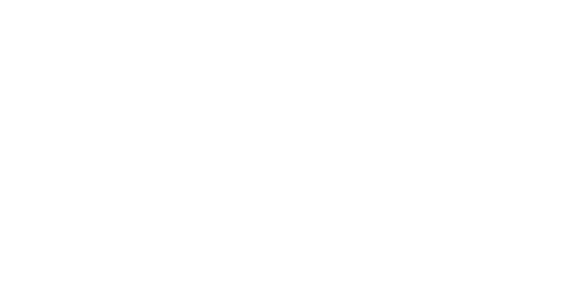

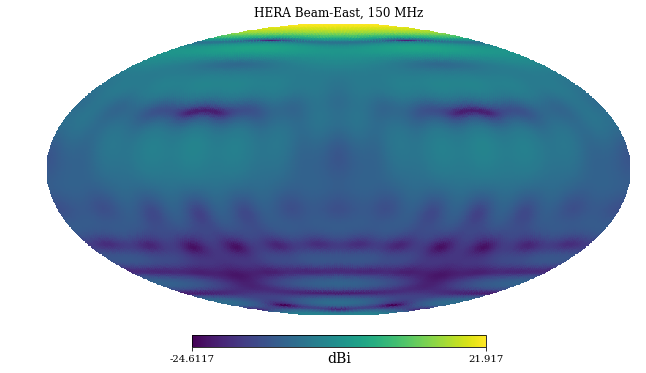

In [62]:
ind = np.where(freqs == 100)[0][0]
hp.mollview(10.0 * np.log10(beam_E[:,ind]), title='HERA Beam-East, 150 MHz',
            unit='dBi')
plt.show()

In [64]:
ind = np.where(freqs == 100)[0][0]

hp.visufunc.cartview(10*np.log10(beam_E[:,ind]),lonra=[-180,180],latra=[-90,90])

In [65]:
10*np.log10(beam_E[:,ind])

array([22.00424825, 22.00424825, 22.00424825, ..., -3.13313444,
       -3.13313448, -3.13316007])

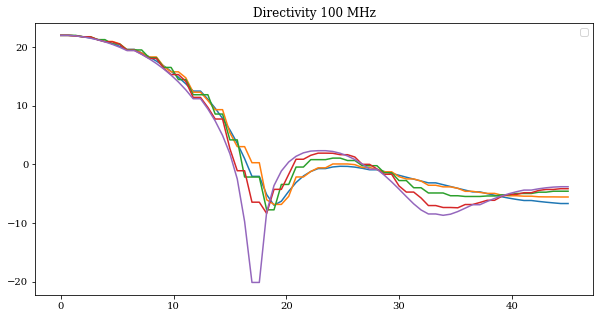

In [78]:
# Right Ascension
theta = np.linspace(0,np.pi/4,70)
plt.rc('font', family='serif')

# Declination
phis = np.deg2rad(np.linspace(0,90,5))
plt.figure(figsize=(10,5))
for phi in phis:
    vals = hp.ang2pix(nside,theta,phi)
    ind = np.where(freqs == 100)[0][0]
    data = beam_E[:,ind]
    plt0 = np.unique(plt0)
    plt0 = 10*np.log10(data[vals])
    plt.plot(np.rad2deg(theta),plt0)

plt.title('Directivity 100 MHz')
plt.legend()
plt.show()

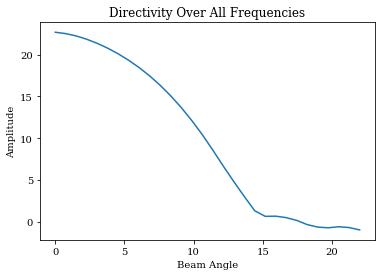

In [8]:
# Loop over all frequencies
n = 30
theta = np.linspace(0,np.deg2rad(22),n)
tot = np.zeros(n)
for freq in freqs:
    ind = np.where(freqs == freq)[0][0]
    data = beam_E[:,ind]
    phi0 = np.deg2rad(0)
    vals0 = hp.ang2pix(nside,theta,phi0)
    plt0 = 10*np.log10(data[vals0])
    tot += plt0
    
tot /= len(freqs)

#theta = np.concatenate([-np.flip(theta,axis=0),theta])
#tot = np.concatenate([np.flip(tot,axis=0),tot])

plt.rc('font', family='serif')
plt.title('Directivity Over All Frequencies')
plt.xlabel('Beam Angle')
plt.ylabel('Amplitude')
plt.plot(np.rad2deg(theta),tot,label=(r'$\alpha$ = ' + str(phi0)))
plt.show()

In [41]:
filename = 'healpix_beam.fits'
beam_E = fits.getdata(filename, extname='BEAM_E')
nside = hp.npix2nside(beam_E.shape[0])
freqs = fits.getdata(filename, extname='FREQS')
freqs = freqs[50:150]
print freqs

[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 199.]


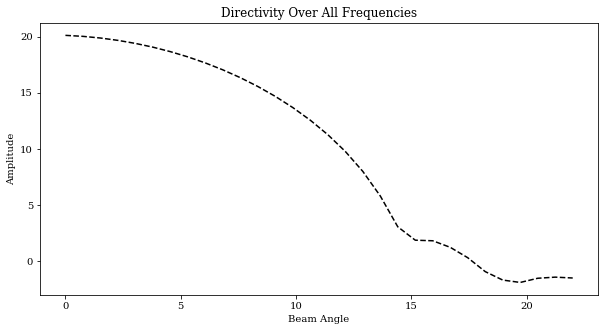

In [43]:
n = 30

normed_vals = np.array([])

m_theta = np.deg2rad(np.linspace(0,22,n))
tot = np.zeros(n)
for freq in freqs:
    ind = np.where(freqs == freq)[0][0]
    data = beam_E[:,ind]
    phi0 = np.deg2rad(0)
    vals0 = hp.ang2pix(nside,m_theta,phi0)
    plt0 = 10*np.log10(data[vals0])
    if normed_vals.shape[0] == 0:
        normed_vals = plt0
    else:
        normed_vals = np.vstack([normed_vals,plt0])
    tot += plt0
    
tot /= len(freqs)

#m_theta = np.concatenate([-np.flip(m_theta,axis=0),m_theta])
#tot = np.concatenate([np.flip(tot,axis=0),tot])

plt.rc('font', family='serif')
plt.figure(figsize=(10,5))
plt.title('Directivity Over All Frequencies')
plt.xlabel('Beam Angle')
plt.ylabel('Amplitude')
plt.plot(np.rad2deg(m_theta),tot,'k--',label=(r'$\alpha$ = ' + str(phi0)))
plt.show()

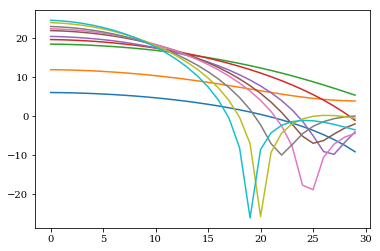

In [79]:
for i in range(normed_vals.shape[0]):
    if i%10==0:
        plt.plot(range(normed_vals[i].shape[0]),normed_vals[i])
plt.show()

10


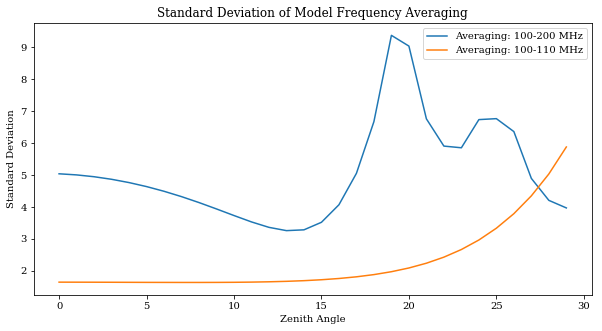

In [80]:
k = 10
print int(normed_vals.shape[0]/k)
rang = int(normed_vals.shape[0]/k)

std_full = np.array([np.std(normed_vals[:,i],ddof=1) for i in range(normed_vals.shape[1])])
std_part = np.array([np.std(normed_vals[:int(normed_vals.shape[0]/k),i],ddof=1) for i in range(normed_vals.shape[1])])

plt.figure(figsize=(10,5))
plt.plot(range(std_full.shape[0]),std_full,label='Averaging: 100-200 MHz')
plt.plot(range(std_full.shape[0]),std_part, label='Averaging: 100-' + str(100+rang) + ' MHz')
plt.xlabel('Zenith Angle')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Model Frequency Averaging')
plt.legend()
plt.show()


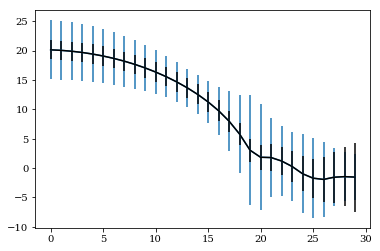

In [81]:
plt.errorbar(range(len(tot)),tot,yerr=std_full)
plt.errorbar(range(len(tot)),tot,c='k',yerr=std_part)
plt.show()

[ 6.09005517  6.11017345  6.18267376  6.39051717  6.74452812  6.98954511
  7.5652128   8.57111747  9.63363825 10.78142049 11.95918186 13.05798651
 14.04244722 14.93210079 15.78183863 16.49492006 17.04447351 17.52373038
 17.94078433 18.27108704 18.52813783 18.73367905 18.90599209 19.04792068
 19.15966795 19.25738333 19.34783303 19.42657914 19.50883659 19.60459641
 19.69867273 19.78243838 19.85219906 19.90592242 19.95683989 20.01452768
 20.08432488 20.1696497  20.27402277 20.37901552 20.50160508 20.64045818
 20.7880753  20.94663781 21.10501135 21.25559769 21.41310529 21.57452235
 21.73408074 21.87810356 22.00424825 22.10362442 22.17834951 22.23362396
 22.28130277 22.32019868 22.35060432 22.38193122 22.41006935 22.43813217
 22.46835149 22.50127487 22.53835377 22.57277454 22.61137965 22.65774672
 22.70764789 22.76899599 22.84493562 22.94094901 23.04872698 23.16967922
 23.29061487 23.40867219 23.52161623 23.62428069 23.72028101 23.80876567
 23.89233236 23.97255408 24.04952697 24.12504326 24

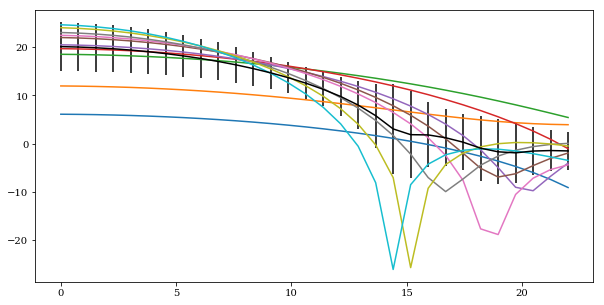

In [82]:
plt.figure(figsize=(10,5))

plt.errorbar(np.linspace(0,22,n),tot,yerr=std_full, c='k')

print normed_vals[:,0]

for i in range(0,normed_vals.shape[0],10):
    plt.plot(np.linspace(0,22,n),normed_vals[i])
    
plt.show()